Importing libraries

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing

In [22]:
"""Training Image Preprocessing"""
import keras

training_set=keras.utils.image_dataset_from_directory(
    "plantdisease-data/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=[128,128],
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [23]:
"""Validation Image Preprocessing"""
import keras

validation_set=keras.utils.image_dataset_from_directory(
    "plantdisease-data/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=[128,128],
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    verbose=True,
)



Found 17572 files belonging to 38 classes.


In [24]:
training_set, validation_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

Building Model

In [25]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [26]:
model=Sequential()

In [27]:
"""Layer1"""
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',
                 input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
"""Layer2"""
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',
                 input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [29]:
"""Layer3"""
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
"""Layer4"""
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
"""Layer5"""
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Dropout(0.25))

In [33]:
model.add(Flatten())

In [34]:
"""Hidden Layer"""
model.add(Dense(units=1500,activation='relu'))

In [35]:
model.add(Dropout(0.25))

In [36]:
"""Output Layer"""
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [37]:
# import tensorflow


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [39]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4875s 2s/step - accuracy: 0.4067 - loss: 2.1193 - val_accuracy: 0.8605 - val_loss: 0.4448
Epoch 2/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4764s 2s/step - accuracy: 0.8423 - loss: 0.4920 - val_accuracy: 0.9180 - val_loss: 0.2581
Epoch 3/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4758s 2s/step - accuracy: 0.9073 - loss: 0.2807 - val_accuracy: 0.9309 - val_loss: 0.2094
Epoch 4/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4731s 2s/step - accuracy: 0.9373 - loss: 0.1901 - val_accuracy: 0.9405 - val_loss: 0.1811
Epoch 5/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4823s 2s/step - accuracy: 0.9515 - loss: 0.1419 - val_accuracy: 0.9425 - val_loss: 0.1918
Epoch 6/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4804s 2s/step - accuracy: 0.9654 - loss: 0.1049 - val_accuracy: 0.9564 - val_loss: 0.1415
Epoch 7/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4777s 2s/step - accuracy: 0.9698 - loss: 0.0910 - val_accuracy: 0.9558 - val_loss: 0.1389
Epoch 8/12
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4767s 2s/step - accuracy: 0.9754 -

In [40]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1482s 675ms/step - accuracy: 0.9949 - loss: 0.0142


In [41]:
train_loss,train_acc

(0.012655314058065414, 0.9957322478294373)

In [42]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 366s 665ms/step - accuracy: 0.9728 - loss: 0.0917


In [43]:
val_loss,val_acc

(0.0963146984577179, 0.9717732667922974)

Saving Model

In [44]:
model.save("plant_disease.keras")

In [45]:
training_history.history

{'accuracy': [0.609815776348114,
  0.8642862439155579,
  0.9171491861343384,
  0.9431681036949158,
  0.9560708403587341,
  0.9669393301010132,
  0.9714773297309875,
  0.9769400358200073,
  0.9789458513259888,
  0.9832136034965515,
  0.9848211407661438,
  0.9851625561714172],
 'loss': [1.3227559328079224,
  0.42429858446121216,
  0.254488468170166,
  0.17468670010566711,
  0.13043096661567688,
  0.098729208111763,
  0.08643504232168198,
  0.06900899857282639,
  0.06525734066963196,
  0.05204233527183533,
  0.047859951853752136,
  0.04642928019165993],
 'val_accuracy': [0.8604598045349121,
  0.9179945588111877,
  0.930855929851532,
  0.9405303597450256,
  0.9425221681594849,
  0.9563510417938232,
  0.9558388590812683,
  0.9573753476142883,
  0.9663669466972351,
  0.9689278602600098,
  0.9680742025375366,
  0.9717732667922974],
 'val_loss': [0.44484955072402954,
  0.2581195533275604,
  0.20941932499408722,
  0.18107309937477112,
  0.19176548719406128,
  0.14154760539531708,
  0.1389147192

In [46]:
"""recording history in json"""
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

In [47]:
import keras
new_model = keras.models.load_model('plant_disease.keras')

In [48]:
new_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [49]:
import json
with open("training_history.json","r") as f:
    training_history_data=json.load(f)

print(training_history_data)

{'accuracy': [0.609815776348114, 0.8642862439155579, 0.9171491861343384, 0.9431681036949158, 0.9560708403587341, 0.9669393301010132, 0.9714773297309875, 0.9769400358200073, 0.9789458513259888, 0.9832136034965515, 0.9848211407661438, 0.9851625561714172], 'loss': [1.3227559328079224, 0.42429858446121216, 0.254488468170166, 0.17468670010566711, 0.13043096661567688, 0.098729208111763, 0.08643504232168198, 0.06900899857282639, 0.06525734066963196, 0.05204233527183533, 0.047859951853752136, 0.04642928019165993], 'val_accuracy': [0.8604598045349121, 0.9179945588111877, 0.930855929851532, 0.9405303597450256, 0.9425221681594849, 0.9563510417938232, 0.9558388590812683, 0.9573753476142883, 0.9663669466972351, 0.9689278602600098, 0.9680742025375366, 0.9717732667922974], 'val_loss': [0.44484955072402954, 0.2581195533275604, 0.20941932499408722, 0.18107309937477112, 0.19176548719406128, 0.14154760539531708, 0.13891471922397614, 0.14905287325382233, 0.11026047170162201, 0.11266368627548218, 0.1192988

Accuracy Visualization

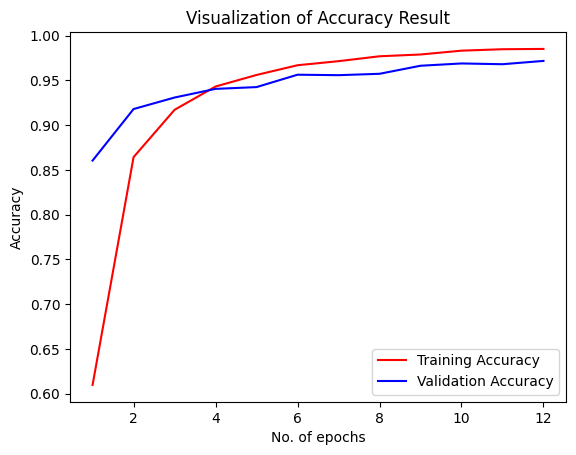

In [50]:

epochs=[i for i in range(1,13)]
plt.plot(epochs,training_history_data['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history_data['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model visualization

In [51]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [52]:
test_set=keras.utils.image_dataset_from_directory(
    "plantdisease-data/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=[128,128],
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [53]:
y_pred=new_model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 370s 671ms/step


array([[1.0000000e+00, 4.2201526e-18, 2.5828001e-18, ..., 1.2886187e-22,
        1.3140396e-22, 5.6005830e-21],
       [1.0000000e+00, 6.6069758e-12, 1.7176051e-13, ..., 2.4533260e-17,
        5.3703239e-17, 2.5872298e-16],
       [1.0000000e+00, 1.2789349e-18, 8.0400930e-18, ..., 2.1870684e-23,
        1.1183172e-21, 3.4374315e-18],
       ...,
       [4.6167998e-09, 1.3013113e-10, 2.0018696e-08, ..., 4.5704662e-10,
        5.7992394e-10, 9.9997270e-01],
       [8.3605636e-11, 7.3688182e-15, 2.5775809e-12, ..., 4.8947811e-14,
        4.3714737e-14, 1.0000000e+00],
       [1.5428385e-16, 3.0183678e-17, 6.4941268e-17, ..., 1.4575488e-20,
        3.1531989e-17, 1.0000000e+00]], dtype=float32)

In [54]:
y_pred.shape

(17572, 38)

In [55]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [56]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [57]:
true_categories=tf.concat([y for x,y in test_set],axis=0)

In [58]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [59]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.99      0.94       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.97      0.96      0.97       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.95      0.95       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.96      0.

In [61]:
cn=confusion_matrix(Y_true,predicted_categories)
cn,cn.shape

(array([[501,   0,   0, ...,   0,   0,   0],
        [  1, 493,   0, ...,   0,   0,   0],
        [  1,   0, 430, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 488,   0,   0],
        [  0,   0,   0, ...,   0, 442,   0],
        [  0,   0,   1, ...,   0,   0, 473]], dtype=int64),
 (38, 38))

Confusion matrix Visualization

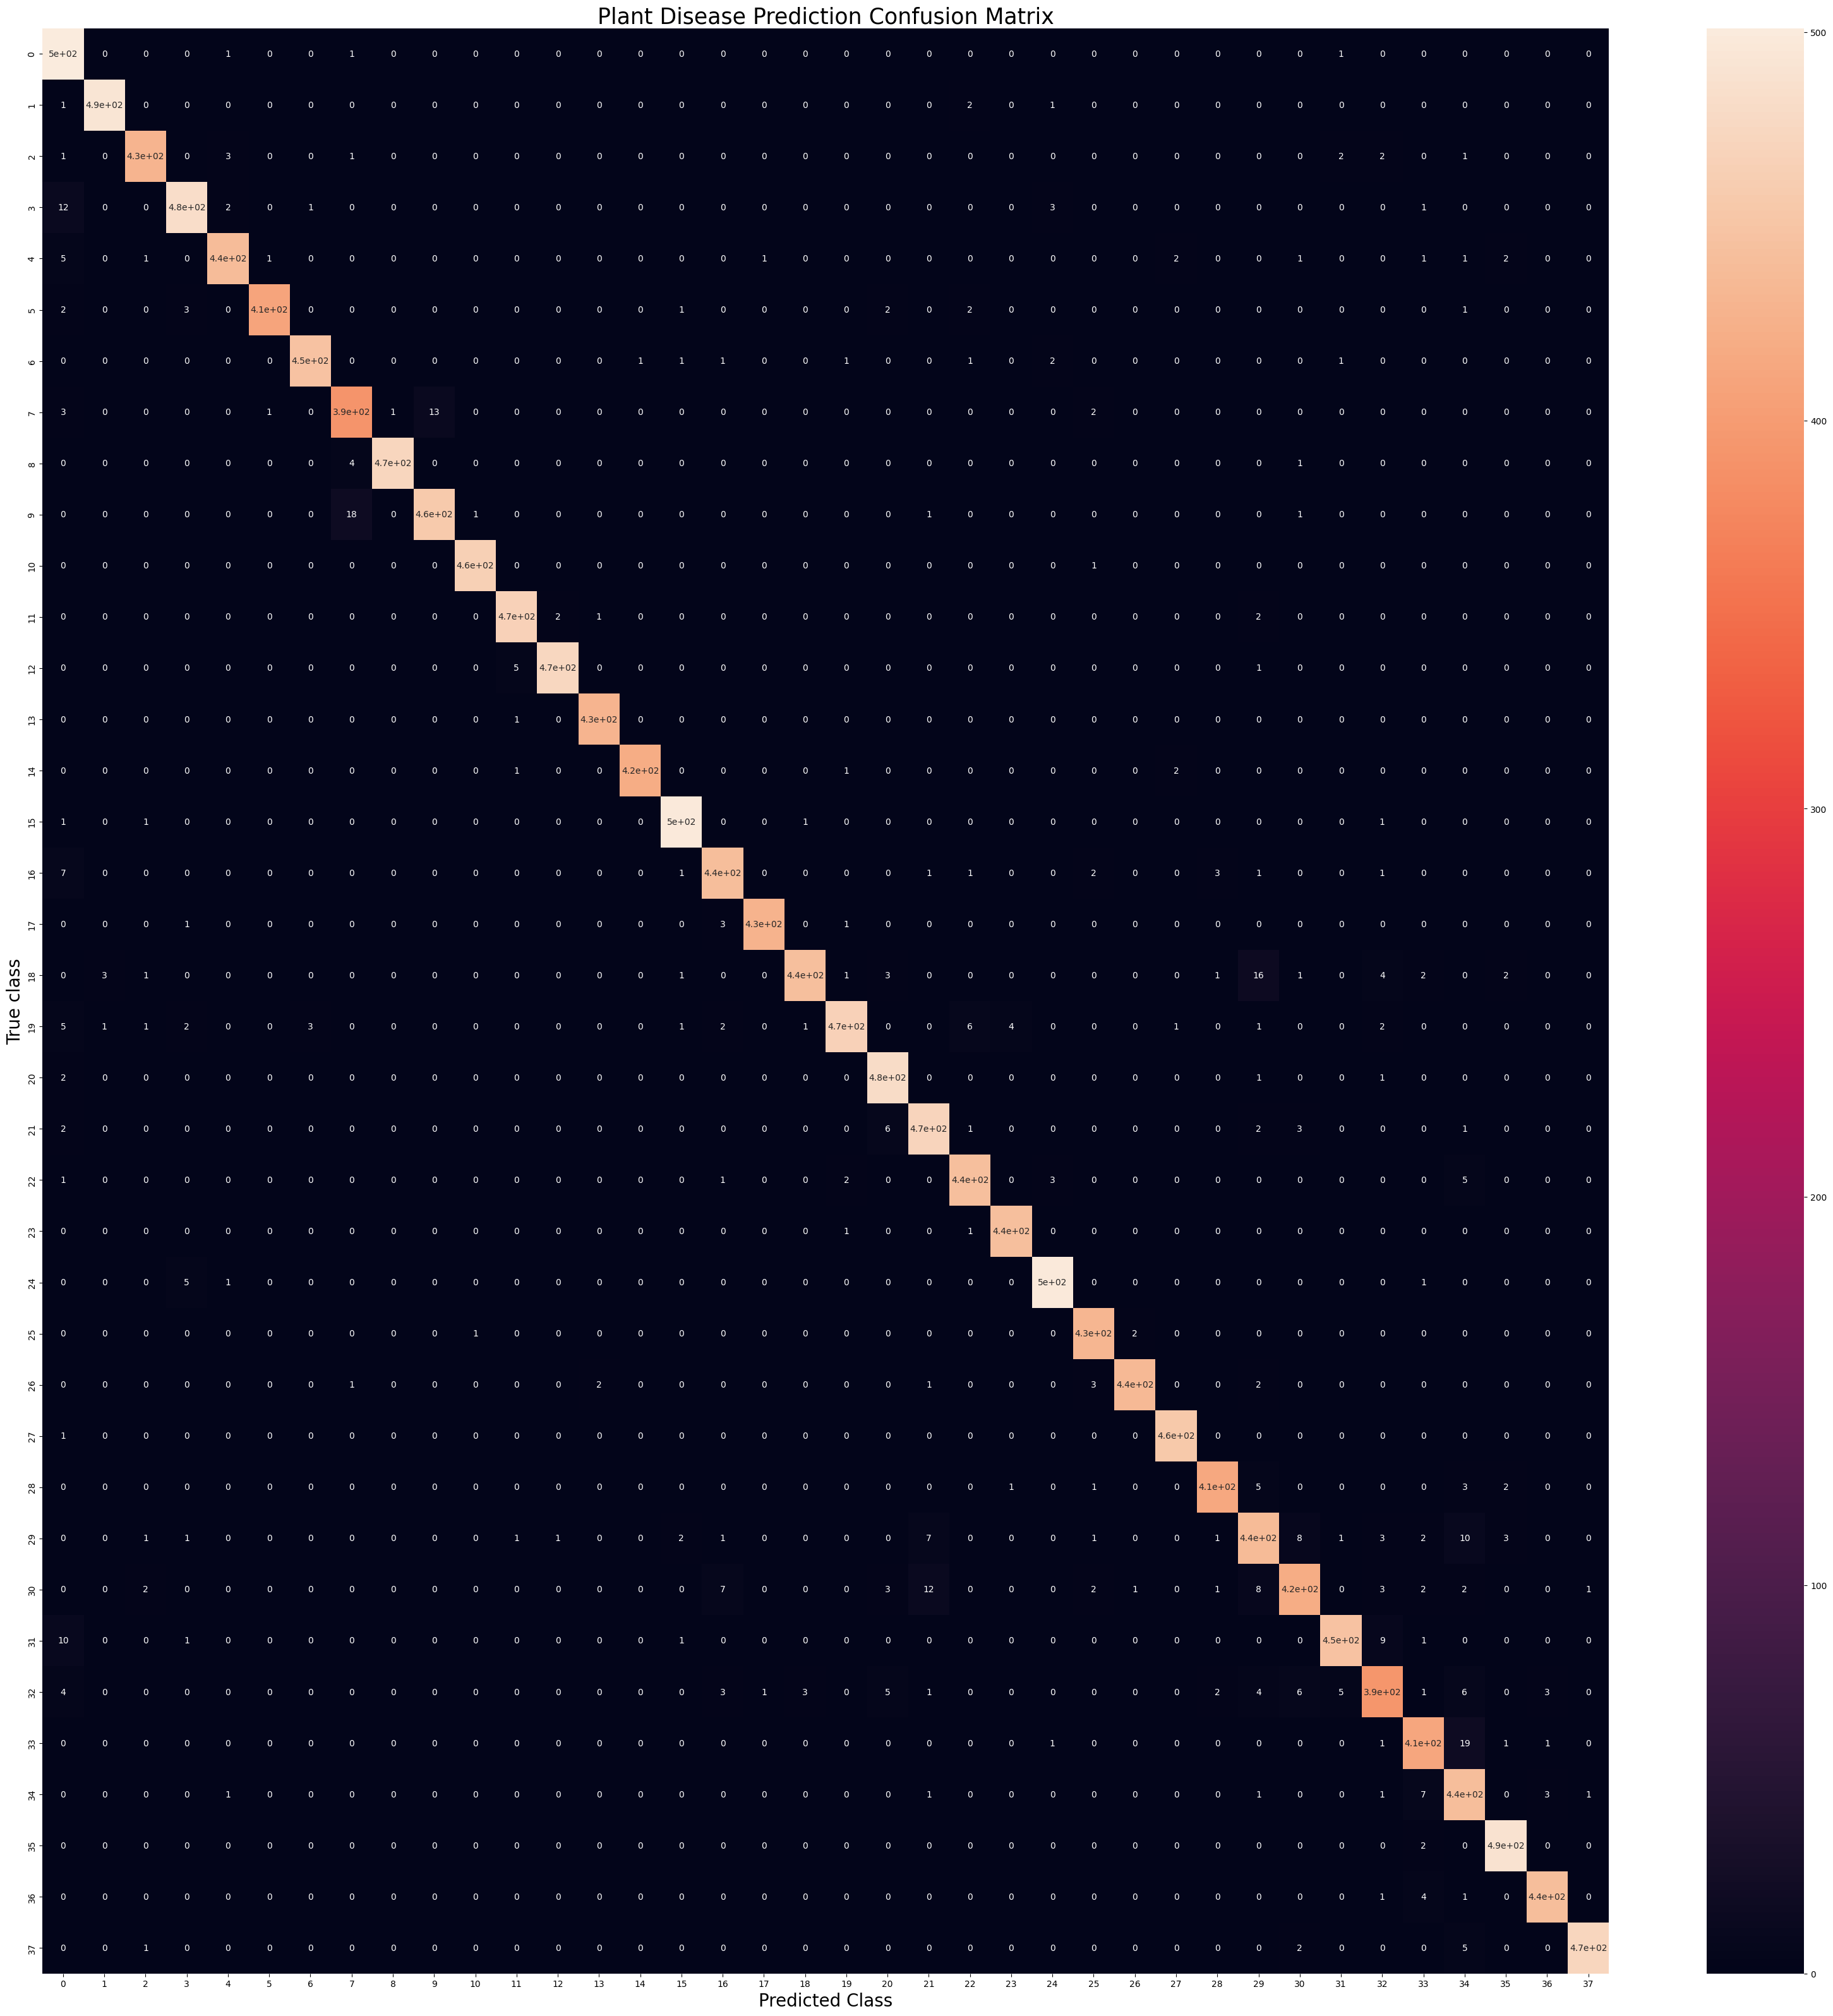

In [62]:
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("True class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()
